In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [23]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

# Declare a Base using `automap_base()`
Base = automap_base()

In [24]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables

In [25]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [28]:
# Use inspector to view all the columns in each table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
print ("-----------------")    
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
-----------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

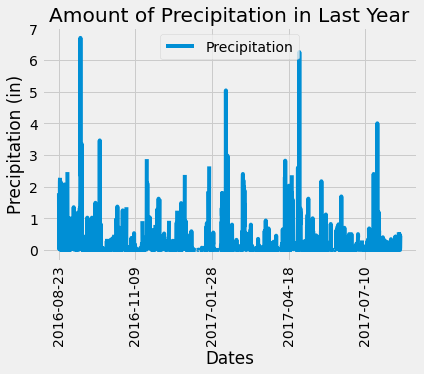

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
      
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns=["Precipitation", "Date"])

# Sort the dataframe by date and replace NaN values with 0
precip_df = precip_df.sort_values("Date")
precip_df

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x="Date", y="Precipitation", rot=90)
plt.xlabel("Dates")
plt.ylabel("Precipitation (in)")
plt.title("Amount of Precipitation in Last Year")
plt.show()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [53]:
# Design a query to show how many stations are available in this dataset
stations = session.query(Measurement.station).group_by(Measurement.station).count()
print(stations)

9


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# We can answer this question by creating a pandas data frame and performing value_counts
# station_df = pd.DataFrame(stations, columns=["station"])
# station_df.value_counts()

# We can also answer this question by using a session query
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature of the most active station?
stations = session.query(Measurement.tobs)

high_temp = stations.filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.desc()).first()
print(high_temp)

low_temp = stations.filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.asc()).first()
print(low_temp)

avg_temp = session.query(func.avg(Measurement.tobs)).\
    group_by(Measurement.station).filter(Measurement.station == 'USC00519281').all()
print(avg_temp)

(85.0,)
(54.0,)
[(71.66378066378067,)]


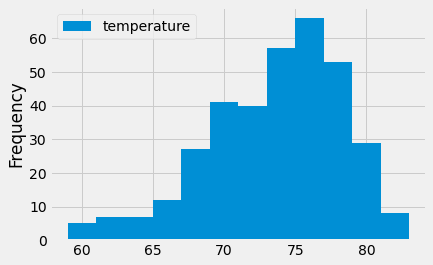

In [57]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

all_stations = session.query(Measurement.tobs)
big_station = all_stations.filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year).order_by(Measurement.date).all()
#print(big_station)

temp_obs_df = pd.DataFrame(big_station, columns=["temperature"])
# max_temp = temp_obs_df["temperature"].max()
# min_temp = temp_obs_df["temperature"].min()
# print(f"The lowest temperature during the vacation was {min_temp} and the highest temperature was {max_temp}.")

temp_obs_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
end_trip = dt.date(2017, 8, 23)
print(calc_temps(one_year, end_trip))

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
